In [2]:
base_path = "home/benji/Capstone Project/"
import re
import os

import pandas as pd
import numpy as np

# Graphing and visualizing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

from subprocess import call
import shutil

## Consolidate the forum data

In [50]:
index = 0
threads = {}

with open("Alboraq.txt", "r", encoding = "utf-8") as file:
    
    for line in file:
        
        # If index is 0, skip (remove header)
        if index == 0:
            index += 1
            continue
        
        try:
            text = line.split("\t")

            # Extract relevant info
            message = text[5]
            thread_id = text[1]

            if thread_id in threads.keys():
                continue
            else:
                threads[thread_id] = message
            index += 1
            if index % 10000 == 0:
                print(index)
        except (ValueError, IndexError):
            index += 1
            if index % 10000 == 0:
                print(index)
    
for i in threads:
#    if len(threads[i].split(" ")) < 1000:
#        continue 
    with open("/home/benji/Capstone Project/Data/Violent/Al Boraq/" + "{0}.txt".format(i), "w+", encoding = "utf-8") as file2:
        file2.write(threads[i])

10000
20000
30000
40000
50000
60000
70000


## Clean the Directory

Simplify the resetting of the Data Clean directory

In [2]:
try:
    shutil.rmtree("/home/benji/Capstone Project/Data Preprocess/")
except FileNotFoundError:
    print("Directory does not exist")
shutil.copytree("/home/benji/Capstone Project/Data/", "/home/benji/Capstone Project/Data Preprocess/")

KeyboardInterrupt: 

## Hezbollah naming fix

In [14]:
hezbollah_path = "/home/benji/Capstone Project/Data/Violent/Hezbollah/Leaders/"
for filename in os.listdir(hezbollah_path):
    newfile =  "l" + filename
    os.rename(hezbollah_path + filename, hezbollah_path + newfile)

## PDF Fix

In [12]:
# Fix the PDF order

# First do ISIS

isis_path = "/home/benji/Capstone Project/Data Preprocess/Violent/ISIS/"

for filename in os.listdir(isis_path):
    new_sentences = []
    with open(isis_path + filename, "r", encoding = "utf-8") as file:
        for line in file:
            new_sentences.append(line[::-1])
        file.close()
    with open(isis_path + filename, "w", encoding = "utf-8") as file2:
        file2.write("\n".join(new_sentences))
        file2.close()
        
del new_sentences

In [13]:
# Fix the PDF order

# First do ISIS

isis_path = "/home/benji/Capstone Project/Data Preprocess/Violent/Ansar Al Sharia/"

for filename in os.listdir(isis_path):
    new_sentences = []
    with open(isis_path + filename, "r", encoding = "utf-8") as file:
        for line in file:
            new_sentences.append(line[::-1])
        file.close()
    with open(isis_path + filename, "w", encoding = "utf-8") as file2:
        file2.write("\n".join(new_sentences))
        file2.close()
        
del new_sentences

## Use a regular expression to preprocess all of the data

In [18]:
arabic_pattern = re.compile("[^\u0600-\u06FF\.\d+\n]", re.UNICODE)
num_pattern = re.compile("[\d+]")

with open("/home/benji/Capstone Project/Data Preprocess/Violent/ISIS/ISIS-g-55.txt", "r", encoding = "utf-8") as file:
    text = file.read()
    arabic = arabic_pattern.sub("", text)
    arabic_withnum = num_pattern.sub(" NUM ", arabic)
    print(arabic_withnum)
    file.close()


تحقيقات



 NUM 

اســتعادةالراعــيتحــولنوعي

فــيعمليــاتجيــشالخالفة



العددالسابعوالعشرونالسنةالسابعة



الثالثاء NUM  NUM رجب NUM  NUM  NUM  NUM هـ



صحيفةأسبوعيةعامة



مقتــل NUM  NUM  NUM مــنالجيــشالصليبــيالفلبينــي







جنــودالخالفــةيســتهدفونوزارةالخارجيــةاليمنيــة

هجــومجديــدلجيش

الخالفــةقــربخناصر

 NUM 



جنــودالدولةاإلســالمية

يســيطرونعلــىمحور



الحيلــةفــيدرنة

 NUM 

خســائركبيــرةلمرتدي

الرافضــةوالبيشــمركة





فــيكركوك



 NUM 

أعظــمالناس



إيمانًا



 NUM  NUM 



رمـوز..





أمأوثــان NUM 

 NUM  NUM 



علــىخطــىبوش

أوهــامانتصارات



علــىخطــىبوش



أوهــامانتصارات



عندماوقفاألحمقاملطاعجورجبوشعىلرأسحاملةالطائراتأبراهاملنكولنليعلن

انتهاءالعملياتالقتاليةيفالعراق،كانوبالشكيعلمبانطالقالعملياتالجهادية

ضدالجيشاألمرييك،ولكنكانهناكحتاممنأقنعهأنالوضعتحتالسيطرة،وأشار

عليهأنيعلناالنتصاريفحربالعراقليستفيدمنذلكيفتربيرها،وإثباتصحة

القراربشنّهارغممعارضةالكثريينلها،واليوميخرجاملسؤولونيفإدارةأوباماليعلنوا

عنقرباإلعالنعنانتصارالوالياتاملتحدةي

## Rename all of the files according to their group

In [19]:
violent_dir = "/home/benji/Capstone Project/Data Preprocess/Violent/"

for group_name in os.listdir(violent_dir):
    for filename in os.listdir(violent_dir + group_name):
        if group_name in filename:
            continue
        newfile = group_name + "-g-" + filename
        os.rename(violent_dir + group_name + "/" + filename, violent_dir + group_name + "/" + newfile)
        
del filenames

In [16]:
violent_dir = "/home/benji/Capstone Project/Data Preprocess/Non-Violent/"

for group_name in os.listdir(violent_dir):
    for filename in os.listdir(violent_dir + group_name):
        if group_name in filename:
            continue
        newfile = group_name + "-g-" + filename
        os.rename(violent_dir + group_name + "/" + filename, violent_dir + group_name + "/" + newfile)

# Run the Cleaning Code

In [20]:
path = "/home/benji/Capstone Project/Data Preprocess/"

# Create Regex for certain patterns
arabic_pattern = re.compile("[^\u0600-\u06FF\.\d+\n ]", re.UNICODE)
num_pattern = re.compile("[\d+]") 
noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
dup_space=re.compile("\s\s+", re.UNICODE)

for (dirpath, dirnames, filenames) in os.walk(path):
    text = ""
    for filename in filenames:
        with open(os.path.join(dirpath, filename), 'r', encoding = 'utf-8') as file: 
            text = file.read()
            text = re.sub(noise,"",text)
            # If the text is now empty, delete the file and continue
            if len(text) == 0:
                os.remove(os.path.join(dirpath, filename))
                continue
            text = arabic_pattern.sub(" ", text)
            text = num_pattern.sub(" NUM ", text)
            text = re.sub(dup_space," ",text)
            file.close()
        with open(os.path.join(dirpath, filename), 'w', encoding = 'utf-8') as file2:
            file2.write(text)
            file2.close()
            
del text

In [5]:
# Bug in al Shabaab
# Create Regex for certain patterns
arabic_pattern = re.compile("[^\u0600-\u06FF\.\d+\n ]", re.UNICODE)
num_pattern = re.compile("[\d+]") 
noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
dup_space=re.compile("\s\s+", re.UNICODE)
num_pattern = re.compile("[\d+]") 
with open("Data/Non-Violent/Mohamed Rateb Al-Nabulsi/8d2014-03-14.txt", 'r', encoding = "utf-8") as file:
    text = file.read()
    text = re.sub(noise,"",text)
    text = arabic_pattern.sub(" ", text)
    text = num_pattern.sub(" NUM ", text)
    text = re.sub(dup_space," ",text)
    print(text)

بسم الله الرحمن الرحيم الخطبة الأولى الحمد لله ثم الحمد لله، الحمد لله الذي هدانا لهذا، وما كنا لنهتدي لولا أن هدانا الله، وما توفيقي ولا اعتصامي ولا توكلي إلا على الله، وأشهد أن لا إله إلا الله وحده لا شريك له، إقرارا بربوبيته وإرغاما بمن جحد به وكفر، وأشهد أن سيدنا محمدا صلى الله عليه وسلم سيد الخلق والبشر ما اتصلت عين بنظر، أو سمعت أذن بخبر، اللهم صل و سلم وبارك على سيدنا محمد، وعلى آل بيته الطيبين الطاهرين، وعلى صحابته الغر الميامين، أمناء دعوته، وقادة ألويته، وارض عنا وعنهم يا رب العالمين، اللهم علمنا ما ينفعنا وانفعنا بما علمتنا وزدنا علما، وأرنا الحق حقا وارزقنا اتباعه، وأرنا الباطل باطلا وارزقنا اجتنابه، واجعلنا ممن يستمعون القول فيتبعون أحسنه، وأدخلنا برحمتك في عبادك الصالحين. تسخير الكون للإنسان تسخير تعريف و تكريم أيها الأخوة الكرام؛ قيل من عرف نفسه عرف ربه، فمن أنت أيها الإنسان؟ هل تدري أنك المخلوق الأول عند الله، الدليل قوله تعالى إنا عرضنا الأمانة على السماوات والأرض والجبال فأبين أن يحملنها وأشفقن منها وحملها الإنسان سورة الأحزاب NUM NUM لأن الإنسان قبل حمل الأمانة كان ع

## Word Count

Get a sense of the word count distribution of the files

In [21]:
path = "/home/benji/Capstone Project/Data Preprocess/"

counts = []
vcounts = []
nvcounts = []
count = 0
for (dirpath, dirnames, filenames) in os.walk(path):
    text = ""
    for filename in filenames:
        if count % 10000 == 0:
            print(count)
        count += 1
        with open(os.path.join(dirpath, filename), 'r', encoding = 'utf-8') as file: 
            text = file.read()
            words = text.split(" ")
            if len(words) > 0:
                counts.append(len(words))
                if "Non-Violent" in dirpath:
                    nvcounts.append(len(words))
                else:
                    vcounts.append(len(words))
                    
            file.close()

0
10000
20000
30000
40000
50000
60000
70000
80000


In [22]:
len(counts)

89896

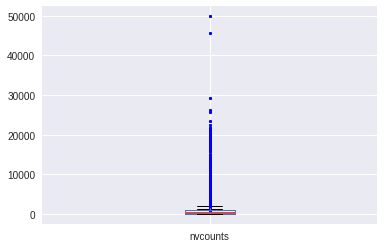

In [18]:
counts_df = pd.DataFrame(data = np.array(counts), columns = ["counts"])
vcounts_df = pd.DataFrame(data = np.array(vcounts), columns = ["vcounts"])
ncounts_df = pd.DataFrame(data = np.array(nvcounts), columns = ["nvcounts"])
                       
countbox = counts_df.boxplot(return_type = 'dict', sym = 'b.')

# Statistics
count_stats = [ countbox['whiskers'][0].get_ydata()[1], # Lower whisker
             countbox['boxes'][0].get_ydata()[0], # Lower box 25%
             countbox['medians'][0].get_ydata()[0], # Median
             countbox['boxes'][0].get_ydata()[2], # Upper 75%
             countbox['whiskers'][1].get_ydata()[1] # Upper whiskers
]

                          
violentbox = vcounts_df.boxplot(return_type = 'dict', sym = 'b.')

# Statistics
violent_stats = [ violentbox['whiskers'][0].get_ydata()[1], # Lower whisker
             violentbox['boxes'][0].get_ydata()[0], # Lower box 25%
             violentbox['medians'][0].get_ydata()[0], # Median
             violentbox['boxes'][0].get_ydata()[2], # Upper 75%
             violentbox['whiskers'][1].get_ydata()[1] # Upper whiskers
]

nviolentbox = ncounts_df.boxplot(return_type = 'dict', sym = 'b.')

# Statistics
nviolent_stats = [ nviolentbox['whiskers'][0].get_ydata()[1], # Lower whisker
             nviolentbox['boxes'][0].get_ydata()[0], # Lower box 25%
             nviolentbox['medians'][0].get_ydata()[0], # Median
             nviolentbox['boxes'][0].get_ydata()[2], # Upper 75%
             nviolentbox['whiskers'][1].get_ydata()[1] # Upper whiskers
]

In [19]:
nviolent_stats
nvnp = np.array(nviolent_stat)
len()

[2.0, 329.0, 563.0, 957.0, 1888.0]

In [20]:
violent_stats

[1.0, 84.0, 160.0, 407.5, 892.0]

In [ ]:
nviolentbox = vnviolents_df.boxplot(return_type = 'dict', sym = 'b.')

# Statistics
nviolent_stats = [ nviolentbox['whiskers'][0].get_ydata()[1], # Lower whisker
             nviolentbox['boxes'][0].get_ydata()[0], # Lower box 25%
             nviolentbox['medians'][0].get_ydata()[0], # Median
             nviolentbox['boxes'][0].get_ydata()[2], # Upper 75%
             nviolentbox['whiskers'][1].get_ydata()[1] # Upper whiskers
]

In [65]:
print(violent_stats)
npcounts = np.array(counts)
print(len(npcounts))
print(len(npcounts[(npcounts < 484.0) & (npcounts > 90.0)]))

[1.0, 93.0, 190.0, 522.0, 1165.0]
89896
44003


In [67]:
filterCounts = npcounts[(npcounts < 484.0) & (npcounts > 90.0)]

fcounts_df = pd.DataFrame(data = np.array(filterCounts), columns = ["counts"])
fcounts_df

,counts
0,471
1,312
2,176
3,120
4,456
5,292
6,114
7,114
8,378
9,115


{'boxes': [<matplotlib.lines.Line2D at 0x7f89ef849828>],
 'caps': [<matplotlib.lines.Line2D at 0x7f89ef7f4908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f89ef804cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f89ef7f4e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f89ef7df828>,
  <matplotlib.lines.Line2D at 0x7f89ef7dfa58>]}

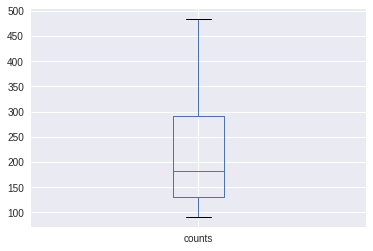

In [68]:
fcounts_df.boxplot(return_type = 'dict', sym = 'b.')

(array([ 10783.,   9568.,   4343.,   3830.,   4010.,   2906.,   2180.,
          2765.,   1881.,   1737.]),
 array([  91. ,  130.2,  169.4,  208.6,  247.8,  287. ,  326.2,  365.4,
         404.6,  443.8,  483. ]),
 <a list of 10 Patch objects>)

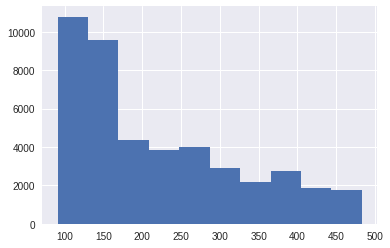

In [69]:
plt.hist(filterCounts)

In [64]:
np.median(filterCounts)

267.0

In [24]:
path = "/home/benji/Capstone Project/Data Preprocess/"


count = 0
vcount = 0
nvcount = 0
for (dirpath, dirnames, filenames) in os.walk(path):
    text = ""
    for filename in filenames:
        if count % 10000 == 0:
            print(count)
        count += 1
        with open(os.path.join(dirpath, filename), 'r', encoding = 'utf-8') as file: 
            text = file.read()
            words = text.split(" ")
            if len(words) > 90:
                if "Non-Violent" in dirpath:
                    nvcount += 1
                else:
                    vcount += 1
            file.close()
            
print("NV " + str(nvcount)  + " V " + str(vcount))

0
10000
20000
30000
40000
50000
60000
70000
80000
NV 7530 V 54735


# Get data to be plugged into the model

Using the clean data created above to create data ready to be put into the model.

## Remove Duplicates

In [9]:
duplicate_dict = {}
path = "/home/benji/Capstone Project/Data Preprocess/"

for (dirpath, dirnames, filenames) in os.walk(path):
    text = ""
    for filename in filenames:
        with open(os.path.join(dirpath, filename), 'r', encoding = 'utf-8') as file: 
            text = file.read()
            words = text.split(" ")
            l = len(words)
            if l in duplicate_dict.keys():
                if text in duplicate_dict[l]:
                    print("Removing " + str(os.path.join(dirpath, filename)))
                    os.remove(os.path.join(dirpath, filename))
                else:
                    duplicate_dict[l].append(text)
            else:
                duplicate_dict[l] = [text]
            file.close()
                
del duplicate_dict           

## New Word Count

Rerun the word count, now with duplicates removed and very small documents removed

In [11]:
path = "/home/benji/Capstone Project/Data Preprocess/"

counts = []
vcounts = []
nvcounts = []
count = 0
for (dirpath, dirnames, filenames) in os.walk(path):
    text = ""
    for filename in filenames:
        if count % 10000 == 0:
            print(count)
        count += 1
        with open(os.path.join(dirpath, filename), 'r', encoding = 'utf-8') as file: 
            text = file.read()
            words = text.split(" ")
            if len(words) > 90:
                counts.append(len(words))
                if "Non-Violent" in dirpath:
                    nvcounts.append(len(words))
                else:
                    vcounts.append(len(words))
                    
            file.close()

0
10000
20000
30000
40000
50000
60000
70000
80000


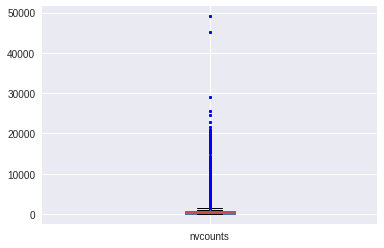

In [5]:
counts_df = pd.DataFrame(data = np.array(counts), columns = ["counts"])
vcounts_df = pd.DataFrame(data = np.array(vcounts), columns = ["vcounts"])
ncounts_df = pd.DataFrame(data = np.array(nvcounts), columns = ["nvcounts"])
                       
countbox = counts_df.boxplot(return_type = 'dict', sym = 'b.')

# Statistics
count_stats = [ countbox['whiskers'][0].get_ydata()[1], # Lower whisker
             countbox['boxes'][0].get_ydata()[0], # Lower box 25%
             countbox['medians'][0].get_ydata()[0], # Median
             countbox['boxes'][0].get_ydata()[2], # Upper 75%
             countbox['whiskers'][1].get_ydata()[1] # Upper whiskers
]

                          
violentbox = vcounts_df.boxplot(return_type = 'dict', sym = 'b.')

# Statistics
violent_stats = [ violentbox['whiskers'][0].get_ydata()[1], # Lower whisker
             violentbox['boxes'][0].get_ydata()[0], # Lower box 25%
             violentbox['medians'][0].get_ydata()[0], # Median
             violentbox['boxes'][0].get_ydata()[2], # Upper 75%
             violentbox['whiskers'][1].get_ydata()[1] # Upper whiskers
]

nviolentbox = ncounts_df.boxplot(return_type = 'dict', sym = 'b.')

# Statistics
nviolent_stats = [ nviolentbox['whiskers'][0].get_ydata()[1], # Lower whisker
             nviolentbox['boxes'][0].get_ydata()[0], # Lower box 25%
             nviolentbox['medians'][0].get_ydata()[0], # Median
             nviolentbox['boxes'][0].get_ydata()[2], # Upper 75%
             nviolentbox['whiskers'][1].get_ydata()[1] # Upper whiskers
]

In [8]:
len(nvcounts)

7756

## Remove small files

In [21]:
path = "/home/benji/Capstone Project/Data Preprocess/"

for (dirpath, dirnames, filenames) in os.walk(path):
    text = ""
    for filename in filenames:
        if count % 10000 == 0:
            print(count)
        count += 1
        with open(os.path.join(dirpath, filename), 'r', encoding = 'utf-8') as file: 
            text = file.read()
            words = text.split(" ")
            if len(words) < 90:
                print(os.path.join(dirpath, filename))
                os.remove(os.path.join(dirpath, filename))
                    
            file.close()

/home/benji/Capstone Project/Data Preprocess/Violent/Houthis/Houthis-g-307.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Houthis/Houthis-g-344.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Houthis/Houthis-g-200.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-1986d2014-08-02.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-2129d2014-07-20.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-2109d2014-07-30.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-2264d2014-07-19.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-2230d2014-07-22.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-2160d2014-07-13.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-2098d2014-07-20.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-2268d2014-07-30.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Hamas/Hamas-g-

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-209044.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-16803.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-15251.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-42672.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-21775.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-18634.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-28543.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-11766.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30761.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34484.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-96780.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-3356.txt
/hom

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-20307.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-62061.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-59317.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-8861.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-19919.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-47584.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-18521.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137784.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-154590.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137580.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-99292.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-5988.txt
/ho

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-172031.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-148147.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-185317.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35894.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-26384.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-242190.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-118174.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134273.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-12587.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-36823.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-152251.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136962.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-125833.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14796.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-200483.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-53152.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-153014.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-149207.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134759.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-231828.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-124493.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-41834.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30223.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-29428.t

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-148307.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-82764.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-49031.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-209072.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-202095.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38809.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39137.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-141760.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30130.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-196451.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-29283.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-11180.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-200482.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-51772.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14494.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30491.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134677.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-188132.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-8356.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30741.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52241.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-182043.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-233866.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-110542.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-178887.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-165139.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-36154.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-126885.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23934.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-2297.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-126861.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-138200.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-85192.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-140387.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35257.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-50822.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133772.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-70551.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137715.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-183976.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38818.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-150441.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-13361.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-189132.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134968.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-145060.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-193384.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-245.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-117066.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-203182.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-9993.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-161096.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-210175.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-150903.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-121161.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137394.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-76858.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135754.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-51124.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135958.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132339.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-57626.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-174410.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-191218.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-40983.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-36004.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-27870.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52735.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-60908.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-32925.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23474.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30612.txt
/

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-50683.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-67014.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23862.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-143918.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-242903.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-186487.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134036.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14902.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-162569.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35898.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-87216.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-40401.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-192192.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-95709.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-159431.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-3498.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-212070.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-3865.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-80953.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135519.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-70054.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-47052.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-65.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137782.txt
/hom

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35213.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134092.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-198136.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-125907.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-46593.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-59787.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134108.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-171967.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38141.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135835.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-190027.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137933.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23049.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38226.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-119995.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-86777.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-29475.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-105.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136112.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-36871.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-75727.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-96313.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34013.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-36940.txt
/hom

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-71790.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135682.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-47035.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-5954.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39716.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-5177.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-37931.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-17889.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-61156.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-95588.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-26001.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-154004.txt
/hom

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132498.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-190212.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-73589.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-19775.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-10395.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-91345.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-144145.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-196647.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-123151.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-184758.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30360.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-153942.t

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-200002.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133593.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-42797.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-16537.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-198431.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-129376.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137043.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-178119.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-227137.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137148.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-208850.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23149

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-180862.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-110182.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-66025.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-18194.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134195.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-138199.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-9954.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-103534.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-47853.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134288.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-107817.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14008.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38146.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136775.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-123981.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23081.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-206144.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132850.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-105019.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-119521.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-11256.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23866.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-251284.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30785.t

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135661.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-166310.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137834.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-156406.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-7499.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-46891.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-183017.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-33162.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-3664.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-33160.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-142430.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-26827.txt


/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-1035.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-104.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-242770.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-21484.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-56733.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-96368.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-147077.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134214.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-70843.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-46102.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133643.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-60975.txt
/ho

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-190581.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136225.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-71850.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-84300.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52021.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23801.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-202525.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-200347.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-82747.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52584.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137408.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137873.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137510.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137553.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-47629.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-106366.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-37983.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-73335.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-61904.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-181252.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39069.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38655.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-123240.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39084.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-198558.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-100336.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135123.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-8111.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132204.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-5247.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-159791.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132485.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135573.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-65641.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-124494.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14940.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-147324.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-228136.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-92364.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-70771.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-116566.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-37818.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-175958.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137706.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-184365.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-189696.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-31112.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-175376.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-17683.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-92664.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-71219.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-150893.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-186311.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-22669.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-179032.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-46066.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-27217.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-37576.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-46327.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-59063.txt
/

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-200142.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-7628.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133471.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-116754.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-21780.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-116345.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-29662.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135211.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-168794.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34607.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-180819.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-158217.t

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132330.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-29680.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-54209.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-186074.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-1018.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-66.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-5579.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-217417.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-70847.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-128942.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-201574.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30359.txt
/hom

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133617.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134272.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-7232.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-175048.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-193486.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-11433.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-211744.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-128930.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-8479.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35133.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-143922.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-16543.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136450.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-184119.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-197445.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-48274.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-17646.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35269.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34195.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-32397.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-5828.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135938.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-27921.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-214073.txt


/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-24092.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-63357.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-180221.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-17321.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133508.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-116740.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-104601.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-94877.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-937.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136847.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-138262.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-9188.txt
/

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133920.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137171.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-184773.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-82121.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-27582.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-31222.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-190154.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-96424.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-175699.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-99541.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-15553.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-57369.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-183906.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134641.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132064.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135311.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-163888.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-180023.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-349.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-10326.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-36627.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39886.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-32326.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-13214.txt


/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-169137.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133358.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-85779.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-118024.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-8329.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-194758.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-53235.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35925.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-158520.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-88222.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133786.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-105746.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-149271.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-129509.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134830.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-204968.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134907.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-236681.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134439.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23487.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-99745.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-174301.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35170.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132069

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136906.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-151886.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-95844.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-219848.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-19284.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-104553.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34740.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-144639.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-192224.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136328.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-123927.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23820.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-202783.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-80566.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-108451.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133623.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137348.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-171835.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-50285.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-11515.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39226.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132713.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-47655.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-95970.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14581.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-70752.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39430.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23861.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-2327.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-16680.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-241956.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-11936.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137149.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-7057.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-56996.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-97290.txt
/hom

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-200594.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-31780.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-181891.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23311.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-209413.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-142268.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-204710.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-50274.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135498.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-28148.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135919.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135163.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-42292.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-232963.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-4623.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132533.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137429.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-86262.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133447.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-1644.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-99924.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-13477.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-11811.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-237476.txt
/

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133571.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23794.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-44088.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-2624.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-50975.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132467.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-25009.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-21320.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-125414.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-138050.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-32636.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-152149.txt


/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-143999.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-226304.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35432.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133345.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-51310.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-105664.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-124387.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39903.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-3088.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-81405.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-151175.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-205788.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-251065.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136009.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134370.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-69980.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-15616.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-145788.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-193007.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-2814.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137462.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-151284.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-208522.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-159047.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-41193.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-41781.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-43476.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-145325.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-190605.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-233284.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14066.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-13501.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-191689.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-122136.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132585.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-155170.t

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-180817.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38386.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-243139.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30221.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34944.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-10305.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-37014.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23347.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-13728.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23367.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-134050.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-169678.txt


/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-37596.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-119583.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-28455.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-9361.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132721.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-33753.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132922.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132586.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-51051.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-148667.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-154189.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-138488.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-96351.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-32327.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-161097.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-143876.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-157024.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137989.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135241.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-116328.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132453.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-12317.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-26826.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-207188.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-28151.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132284.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-191863.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-20728.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-115551.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52886.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-190215.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-72423.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-162860.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-168918.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136683.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52255.t

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-155805.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-151914.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-154276.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-160926.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35684.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-236703.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137588.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-20745.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-186590.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-36797.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-149179.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-27046.

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-40954.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-33451.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-113294.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-30454.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-9665.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-135652.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136258.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-227682.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-12408.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-64797.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-26279.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-81428.txt
/

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-128361.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-144658.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-3457.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-121444.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-180167.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-5102.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-33048.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-12922.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-27608.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14989.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-157868.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52675.txt
/

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-210705.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-238089.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-4000.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136329.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-70681.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-54181.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-15041.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-57684.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-10596.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-42238.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-14533.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-15264.txt
/h

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-32811.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-770.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-21637.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132871.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-201212.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-79589.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-185277.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-154172.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35189.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-120261.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-230471.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132782.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-181149.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52060.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-73061.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-6147.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-171469.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-13506.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-36793.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-46950.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-105433.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-124954.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-16827.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-39324.txt
/

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-33237.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-204956.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-82654.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132936.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-63045.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-142428.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38551.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-52912.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132134.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38072.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38949.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-56655.txt


/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-80454.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-162146.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-54033.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133359.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-35429.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-38924.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-31784.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-57878.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-157152.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34574.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34992.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-61183.txt
/

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-178114.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-164543.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-180083.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-33869.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-23935.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-129742.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-157391.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-320.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-3139.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-27636.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-362.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-31085.txt
/hom

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136333.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-136105.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-44007.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-46045.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-19984.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133228.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-83580.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133646.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-56722.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-137845.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-29799.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-34741.txt

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-84387.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-131983.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-132202.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-133131.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-238715.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-169405.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-78199.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-110993.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-33960.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-191295.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-236014.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-317.tx

/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-161998.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-158307.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-16538.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-9358.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-127618.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-79392.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-185165.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-173129.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-184485.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-55573.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-3043.txt
/home/benji/Capstone Project/Data Preprocess/Violent/Al Boraq/Al Boraq-g-72251.txt


/home/benji/Capstone Project/Data Preprocess/Non-Violent/CNN/CNN-g-22d-2017-10-13.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/CNN/CNN-g-31d-2017-10-14.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-6d18-05-2009.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-1066d24-02-2011.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-6204d10-07-2016.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-6448d31-01-2017.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-2457d15-10-2014.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-5947d15-12-2015.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic 

/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-342d14-05-2009.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-33d24-12-2007.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-1102d20-03-2011.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-849d03-11-2010.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-32d17-12-2007.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-659d19-05-2010.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-6576d30-05-2017.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-1633d12-07-2012.txt
/home/benji/Capstone Pr

/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-5811d01-10-2015.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-1449d13-02-2012.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-945d.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-2322d30-06-2014.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-1706d18-09-2012.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-3612d20-04-2015.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-1233d20-07-2011.txt
/home/benji/Capstone Project/Data Preprocess/Non-Violent/GA on Islamic Affairs/GA on Islamic Affairs-g-1607d18-06-2013.txt
/home/benji/Capstone Projec